# Import libraries and mount Google Drive on Colab

In this section, we discuss about the packages needed to be installed in order to run the experiments for the project. We listed down the required packages for the project. We also discuss as to how to mount the Google Drive on Google Colab and also how to upload data to Colab Notebook.

## Required packages:
* nltk
* gensim
* wget
* pickle
* tensorflow
* numpy
* matplotlib
* tempfile
* wget
* tarfile
* gzip
* zipfile


In [0]:
# Selecting the tensorflow 1 version for our project
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
# Installing nltk, pyrouge, gensim, wget packages
!pip install nltk
!pip install pyrouge
!pip install gensim
!pip install wget
  
import nltk
nltk.download('punkt')

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for pyrouge: filename=pyrouge-0.1.3-cp36-none-any.whl size=191613 sha256=76dbf996839e99faf2f8bee865cb1f8e8e3d9c4a93a2a9f39df983a65f0aad68
  Stored in directory: /root/.cache/pip/wheels/75/d3/0c/e5b04e15b6b87c42e980de3931d2686e14d36e045058983599
Successfully built pyrouge
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=aa2402c3c78199a4a124bae6787105871874a2637be70a56565dee920ab109bc
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#Installing package for unzipping files
!sudo apt-get install p7zip-full p7zip-rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following NEW packages will be installed:
  p7zip-rar
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 43.1 kB of archives.
After this operation, 113 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 p7zip-rar amd64 16.02-2 [43.1 kB]
Fetched 43.1 kB in 0s (101 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package p7zip

In [0]:
#Unzipping files
!7z e data_50k.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 25525385 bytes (25 MiB)

Extracting archive: data_50k.7z
--
Path = data_50k.7z
Type = 7z
Physical Size = 25525385
Headers Size = 150
Method = LZMA:23
Solid = -
Blocks = 1

  0%      8% - data_50k.csv                    16% - data_50k.csv                    24% - data_50k.csv                    32% - data_50k.csv                    41% - data_50k.csv                    48% - data_50k.csv                    55% - data_50k.csv                    63% 

In [0]:
# Importing libraries for the project
import os,re,sys,codecs,string
from importlib import reload
import tensorflow.compat.v1 as tf 
from tensorflow.contrib import rnn
import tensorflow as tf
tf.disable_v2_behavior()
tf.disable_eager_execution()

import re
from nltk.corpus import stopwords
import time
from tensorflow.python.layers.core import Dense
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
print('TensorFlow Version: {}'.format(tf.__version__))
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
import re
import collections
import pickle
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim
import tempfile
import wget
import os
import tarfile
import gzip
import zipfile
import argparse
#tf.disable_v2_behavior()
#tf.disable_eager_execution()
tf.compat.v1.disable_eager_execution()

TensorFlow Version: 1.15.2


In [0]:
#adding logging
import logging

logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.INFO)
logger = logging.getLogger("bert")

import json

In [0]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
directory_path = '/content/gdrive/My Drive/Bengali Summarization/'
%cd /content/gdrive/My Drive/Bengali Summarization/

/content/gdrive/My Drive/Bengali Summarization


In [0]:
#Uploading files to the drive
from google.colab import files
uploaded = files.upload()

Saving stopwords_list_ben.txt to stopwords_list_ben.txt


# Data Preprocessing

In this section, we discuss about the data preprocessing steps such as removing unwarranted characters, English alphabets, various punctuations, Bengali stopwords, etc. in order to clean the dataset for training and validation purposes. 

In [0]:
# Reading bengali stopwords from a file
with open('stopwords_list_ben.txt','r') as g:
    lines=g.readlines()
    stopwords_bn= [word for line in lines for word in line.split()]

In [0]:
# cleaning the text, performing data cleaning
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
                
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', str(text), flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', str(text))
    text = re.sub(r'&amp;', '', str(text)) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', str(text))
    text = re.sub(r'<br />', ' ', str(text))
    text = re.sub(r'\'', '', str(text))
    text = re.sub(r"[a-zA-Z0-9_.-]",' ', str(text))
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_fullstop = u"\u0964"
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    text= whitespace.sub(" ",text).strip()
    text = re.sub(punctSeq, " ", text)
    text = re.sub(bangla_fullstop, " ",text)
    text = re.sub(punc, " ", text)
        
    if remove_stopwords:
        stopped_tokens=[i for i in text.split() if not i in stopwords_bn]
        #stopped_tokens=[re.sub(r'[^\W\d_,;]',' ', i) for i in stopped_tokens]
        #stopped_tokens=[re.sub(r'[\w\s]','',i, re.UNICODE) for i in stopped_tokens]
        #stopped_tokens=[re.sub(r"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]",' ', i) for i in stopped_tokens]
        stopped_tokens=[re.sub(r"[\u09E4-\u09EF\u0964\09FB\u201C\u201D\u2018\u2019\u10191]",'', str(i)) for i in stopped_tokens]
        stopped_tokens=[re.sub(r"[’,‘‘!:?;""'-(''’’`)]",'', str(i)) for i in stopped_tokens]
        stopped_tokens=[re.sub(r"[a-zA-Z0-9_.-]",'', str(i)) for i in stopped_tokens]
        text = text.split()
        text = [w for w in text if not w in stopped_tokens]
        text = " ".join(text)

    return text

In [0]:
# Reading the dataset va pandas
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('/content/gdrive/My Drive/Bengali Summarization/data_50k.csv', encoding='utf-8')

In [0]:
# This is how the dataset looks like: title is the ground truth for summary, article as the content
df

,title,content
0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,পাসওয়ার্ড ভুলে যান!,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,চলে গেলেন মাউস উদ্ভাবক,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...
...,...,...
49997,প্রধান শিক্ষকের কার্যালয়ে তালা ঝুলছে এক মাস,রাজশাহীর বাঘা উপজেলার জোতরাঘব উচ্চবিদ্যালয় ও ব...
49998,দুপচাঁচিয়া ও শেরপুরে অস্ত্র গুলি উদ্ধার,বগুড়ার দুপচাঁচিয়া উপজেলার জয়পুরপাড়া থেকে গত বৃ...
49999,বগুড়ায় বিশেষ অভিযানে আরও ৭০ জন গ্রেপ্তার,বগুড়ায় পুলিশের বিশেষ অভিযানে ২৪ ঘণ্টায় জামায়াত...
50000,ভোটের আগে ভোট,নাটোরের গুরুদাসপুর উপজেলা পরিষদ নির্বাচনের আগ...


In [0]:
df.describe()

,title,content
count,50002,49984
unique,45934,49703
top,আ জ কে র ছ বি,-1
freq,126,18


In [0]:
df.title.describe()

count             50002
unique            45934
top       আ জ কে র ছ বি
freq                126
Name: title, dtype: object

In [0]:
df.content.describe()

count     49984
unique    49703
top          -1
freq         18
Name: content, dtype: object

In [0]:
# Clean the summaries and texts
clean_summaries = []
for summary in df.title:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))
print("Summaries are complete.")

clean_texts = []
for text in df.content:
    clean_texts.append(clean_text(text, remove_stopwords=False))
print("Texts are complete.")

Summaries are complete.
Texts are complete.


In [0]:
# Displaying the cleaned article from which the model will generate summaries
clean_texts[0]

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন  এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন খাদ্যে বিষক্রিয়ায় তাঁরা শ্রমিকেরা অসুস্থ হয়ে পড়েছেন  এতে আতঙ্কিত হওয়ার কিছু নেই  অসুস্থদের চিকিত্সা দেওয়া হয়েছে কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায় উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়  টিফিনে ছিল ডিম রুটি পেটিস ও কলা  টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন  ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়  এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে  অনেকেই কারখানার মেঝেতে ঢলে পড়ে  এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল সফিপুর মডার্ন হাসপাতাল উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে  বাসি প

In [0]:
clean_summaries

['কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ বিক্ষোভ',
 'সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি',
 'সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত',
 'পাসওয়ার্ড ভুলে যান',
 'চলে গেলেন মাউস উদ্ভাবক',
 'অ্যান্ড্রয়েডের বড় ত্রুটির খোঁজ',
 'খালেদা দুষ্টু কথা বলেছেন স্বরাষ্ট্রমন্ত্রী',
 'আরও ১১টি বিমা কোম্পানি অনুমোদন পেল',
 'সিএনজি স্টেশনে কাল থেকে অনির্দিষ্টকালের ধর্মঘট',
 'ওয়েবসাইটে মমতাজ বাপ্পার গান অডিও',
 'পুনর্মিলনের আশায় কেটিকে ক্রুজের চিঠি',
 'ইলুলিয়ার থাকার ব্যবস্থা করলেন সালমান',
 'দুর্ঘটনায় আহত সাঈদ বাবু',
 'জীবনের সেরা সময় পার করছি নেইমার',
 'সিএনজি স্টেশনে কাল থেকে অনির্দিষ্টকালের ধর্মঘট',
 'মাউশির কর্মচারী নিয়োগে অনিয়মের অভিযোগ নিয়ে তদন্ত কমিটি',
 ' নামকরা সংস্থার জরিপে জনপ্রিয় নেতা খালেদা হাসিনা তারেক ',
 'গাজীপুরে সেনা মোতায়েনের দরকার নেই তোফায়েল',
 'থাইল্যান্ডের কাছে বাংলাদেশি জাহাজডুবি নিখোঁজ ১০',
 'পরিমলের বিরুদ্ধে নির্যাতিত ছাত্রীর মায়ের সাক্ষ্য',
 'শীর্ষ দশে ফিরল ব্রাজিল',
 'রমজানে র\u200c্যাবের বাড়তি নিরাপত্তা ব্যবস্থা',
 'সাড়ে চার ঘণ্টা পরে ঢাকা চট্টগ্রাম সিল

In [0]:
# Inspect the cleaned summaries and texts to ensure they have been cleaned well
for i in range(5):
    print("Clean Review #",i+1)
    print(clean_summaries[i])
    print(clean_texts[i])
    print()

Clean Review # 1
কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ বিক্ষোভ
গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন  এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন খাদ্যে বিষক্রিয়ায় তাঁরা শ্রমিকেরা অসুস্থ হয়ে পড়েছেন  এতে আতঙ্কিত হওয়ার কিছু নেই  অসুস্থদের চিকিত্সা দেওয়া হয়েছে কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায় উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়  টিফিনে ছিল ডিম রুটি পেটিস ও কলা  টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন  ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়  এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে  অনেকেই কারখানার মেঝেতে ঢলে পড়ে  এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল সফিপুর মডার্ন হাসপাত

# Train Word2vec on dataset

In this section, we train Word2vec modle on our dataset. This generates word embeddings for Bengali.

In [0]:
# We merge both the articles and the sumamaries and train word2vec on the entire dataset
clean_documents_list = [clean_texts[i].split() for i in range(len(clean_texts))] + [clean_summaries[i].split() for i in range(len(clean_summaries))]
len(clean_documents_list)

100004

In [0]:
#clean_documents_list = [clean_texts[i].split() for i in clean_text] + [clean_summaries[i].split() for i in clean_summaries]
len(clean_documents_list)
import gensim
word2vec_beng_vec = gensim.models.Word2Vec(
        clean_documents_list,
        size=300,
        window=10,
        min_count=1, sg=1)
#word2vec_beng_vec.train(clean_documents_list, total_examples=len(clean_documents_list), epochs=10)
word2vec_beng_vec.save(directory_path +"word2vec_bengali.bin")
#word2vec_beng_vec.wv.save('drive/My Drive/Colab Notebooks/Model 4_5/' +"model_arabic_extreme.model")

03/10/2020 22:54:27 - INFO - gensim.models.word2vec -   collecting all words and their counts
03/10/2020 22:54:27 - INFO - gensim.models.word2vec -   PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
03/10/2020 22:54:28 - INFO - gensim.models.word2vec -   PROGRESS: at sentence #10000, processed 2670531 words, keeping 123309 word types
03/10/2020 22:54:28 - INFO - gensim.models.word2vec -   PROGRESS: at sentence #20000, processed 5242812 words, keeping 181127 word types
03/10/2020 22:54:29 - INFO - gensim.models.word2vec -   PROGRESS: at sentence #30000, processed 7847991 words, keeping 239238 word types
03/10/2020 22:54:30 - INFO - gensim.models.word2vec -   PROGRESS: at sentence #40000, processed 10416841 words, keeping 284278 word types
03/10/2020 22:54:31 - INFO - gensim.models.word2vec -   PROGRESS: at sentence #50000, processed 13051399 words, keeping 325981 word types
03/10/2020 22:54:31 - INFO - gensim.models.word2vec -   PROGRESS: at sentence #60000, processed 1

# Data Statistics

In this section, we try to find the size of the vocabulary, the length of the embedding matrix, the percentage of missing words from the vocabulary, the count of <UNK> tokens in the summaries and the news articles. We also built dictionary where we map words to their respective positions and the vice-versa.

In [0]:
# Creating a dictionary of words with their frequency
def count_words(count_dict, text):
    '''Count the number of occurrences of each word in a set of text'''
    
    for sentence in text:
        for word in sentence.split():
            if word not in count_dict:
                count_dict[word] = 1
            else:
                count_dict[word] += 1

In [0]:
# Find the number of times each word was used and the size of the vocabulary
word_counts = {}

count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 312294


In [0]:
#Creating an embedding matrix by loading the word vectors 
from gensim.models import Word2Vec
embeddings_index = {}
embedding = Word2Vec.load('word2vec_bengali.bin')
for word in embedding.wv.vocab:
    #values = embedding.wv.word_vec(word)
    #embeddings_index[word] = np.asarray(values)
    embeddings_index[word] = embedding.wv.word_vec(word)

print('Word embeddings:', len(embeddings_index))

05/30/2020 17:34:27 - INFO - gensim.utils -   loading Word2Vec object from word2vec_bengali.bin
05/30/2020 17:34:30 - INFO - gensim.utils -   loading wv recursively from word2vec_bengali.bin.wv.* with mmap=None
05/30/2020 17:34:30 - INFO - gensim.utils -   loading vectors from word2vec_bengali.bin.wv.vectors.npy with mmap=None
05/30/2020 17:34:37 - INFO - gensim.utils -   setting ignored attribute vectors_norm to None
05/30/2020 17:34:37 - INFO - gensim.utils -   loading vocabulary recursively from word2vec_bengali.bin.vocabulary.* with mmap=None
05/30/2020 17:34:37 - INFO - gensim.utils -   loading trainables recursively from word2vec_bengali.bin.trainables.* with mmap=None
05/30/2020 17:34:37 - INFO - gensim.utils -   loading syn1neg from word2vec_bengali.bin.trainables.syn1neg.npy with mmap=None
05/30/2020 17:34:40 - INFO - gensim.utils -   setting ignored attribute cum_table to None
05/30/2020 17:34:40 - INFO - gensim.utils -   loaded word2vec_bengali.bin


Word embeddings: 327690


In [0]:
# Embedding vector of a Bengali word
embeddings_index['সংসদে']

array([ 2.11478174e-01,  4.68013942e-01, -2.01726094e-01, -7.53245294e-01,
        2.50992358e-01,  5.12265086e-01, -1.88905180e-01,  5.45529068e-01,
        6.16030395e-01, -1.71015620e-01,  7.47150108e-02,  7.97146186e-02,
       -6.33777119e-04,  8.41204762e-01, -8.08260590e-02, -1.38955116e-01,
       -3.13208461e-01,  2.12650940e-01, -5.35259366e-01, -2.19588712e-01,
        1.48123547e-01,  1.22719713e-01,  5.55495322e-01,  2.45852754e-01,
       -2.00168237e-01, -3.36279161e-02, -4.83943447e-02, -1.32596642e-01,
        2.24369064e-01,  2.88641602e-01,  2.22348735e-01, -3.53066742e-01,
       -1.56904608e-01, -3.78298849e-01, -1.41356915e-01, -3.33057672e-01,
       -3.31110135e-02,  5.34820072e-02, -1.90832525e-01, -1.35848671e-01,
        4.50150400e-01, -2.70546257e-01,  2.25320697e-01, -4.54177596e-02,
       -9.29747298e-02, -1.53556885e-02, -1.24837749e-01, -1.09042846e-01,
        2.00588986e-01,  1.52169362e-01,  3.02039146e-01, -1.83462635e-01,
        2.61445671e-01,  

In [0]:
# Find the number of words that are missing from the vocabulary, and are used more than our threshold. 
#Though its not necessary as we didn't use any pretrained word embeddings as we have trained the word embeddingds on the dataset
missing_words = 0
threshold = 20

for word, count in word_counts.items():
    if count > threshold:
        if word not in embeddings_index:
            missing_words += 1
            
missing_ratio = round(missing_words/len(word_counts),4)*100
            
print("Number of words missing:", missing_words)
print("Percent of words that are missing from vocabulary: {}%".format(missing_ratio))

Number of words missing from CN: 3
Percent of words that are missing from vocabulary: 0.0%


In [0]:
# Calculating number of unique words, extending the vocabulary with specialtokens such as "<UNK>","<PAD>","<EOS>","<GO>" to mark the  beginning, end of sequences 
# Creating dctionary mapping words to integers and the vice-versa
#dictionary to convert words to integers
vocab_to_int = {} 

value = 0
for word, count in word_counts.items():
    if count >= threshold or word in embeddings_index:
        vocab_to_int[word] = value
        value += 1

# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>","<EOS>","<GO>"]   

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

# Dictionary to convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total number of unique words:", len(word_counts))
print("Number of words we will use:", len(vocab_to_int))
print("Percent of words we will use: {}%".format(usage_ratio))

Total number of unique words: 312294
Number of words we will use: 312065
Percent of words we will use: 99.92999999999999%


In [0]:
len(vocab_to_int)

312065

In [0]:
#mapping words to their respective positions
vocab_to_int

{'কালিয়াকৈরে': 0,
 'টিফিন': 1,
 'খেয়ে': 2,
 '৫০০': 3,
 'শ্রমিক': 4,
 'অসুস্থ': 5,
 'বিক্ষোভ': 6,
 'সেমিফাইনাল': 7,
 'বাধাও': 8,
 'পেরিয়ে': 9,
 'গেলেন': 10,
 'লিসিকি': 11,
 'সংসদে': 12,
 'খালেদার': 13,
 'অভিযোগের': 14,
 'জবাব': 15,
 'দিয়েছে': 16,
 'ভারত': 17,
 'পাসওয়ার্ড': 18,
 'ভুলে': 19,
 'যান': 20,
 'চলে': 21,
 'মাউস': 22,
 'উদ্ভাবক': 23,
 'অ্যান্ড্রয়েডের': 24,
 'বড়': 25,
 'ত্রুটির': 26,
 'খোঁজ': 27,
 'খালেদা': 28,
 'দুষ্টু': 29,
 'কথা': 30,
 'বলেছেন': 31,
 'স্বরাষ্ট্রমন্ত্রী': 32,
 'আরও': 33,
 '১১টি': 34,
 'বিমা': 35,
 'কোম্পানি': 36,
 'অনুমোদন': 37,
 'পেল': 38,
 'সিএনজি': 39,
 'স্টেশনে': 40,
 'কাল': 41,
 'থেকে': 42,
 'অনির্দিষ্টকালের': 43,
 'ধর্মঘট': 44,
 'ওয়েবসাইটে': 45,
 'মমতাজ': 46,
 'বাপ্পার': 47,
 'গান': 48,
 'অডিও': 49,
 'পুনর্মিলনের': 50,
 'আশায়': 51,
 'কেটিকে': 52,
 'ক্রুজের': 53,
 'চিঠি': 54,
 'ইলুলিয়ার': 55,
 'থাকার': 56,
 'ব্যবস্থা': 57,
 'করলেন': 58,
 'সালমান': 59,
 'দুর্ঘটনায়': 60,
 'আহত': 61,
 'সাঈদ': 62,
 'বাবু': 63,
 'জীবনের': 64,
 'সেরা': 65,
 'সময়': 66

In [0]:
# Need to use 300 for embedding dimensions to match CN's vectors.
embedding_dim = 300
nb_words = len(vocab_to_int)

# Create matrix with default values of zero
word_embedding_matrix = np.zeros((nb_words, embedding_dim), dtype=np.float32)
for word, i in vocab_to_int.items():
    if word in embeddings_index:
        word_embedding_matrix[i] = embeddings_index[word]
    else:
        # If word not in embedding matrix,, create a random embedding for it
        new_embedding = np.array(np.random.uniform(-1.0, 1.0, embedding_dim))
        embeddings_index[word] = new_embedding
        word_embedding_matrix[i] = new_embedding

# Check if value matches len(vocab_to_int)
print(len(word_embedding_matrix))

312065


In [0]:
def convert_to_ints(text, word_count, unk_count, eos=False):
    '''Convert words in text to an integer.
       If word is not in vocab_to_int, use UNK's integer.
       Total the number of words and UNKs.
       Add EOS token to the end of texts'''
    ints = []
    for sentence in text:
        sentence_ints = []
        for word in sentence.split():
            word_count += 1
            if word in vocab_to_int:
                sentence_ints.append(vocab_to_int[word])
            else:
                sentence_ints.append(vocab_to_int["<UNK>"])
                unk_count += 1
        if eos:
            sentence_ints.append(vocab_to_int["<EOS>"])
        ints.append(sentence_ints)
    return ints, word_count, unk_count

In [0]:
# Apply convert_to_ints to clean_summaries and clean_texts
# Calculating the number of unkown tokens in articles and summaries 
word_count = 0
unk_count = 0

int_summaries, word_count_summaries, unk_count_summaries = convert_to_ints(clean_summaries, word_count, unk_count)
int_texts, word_count_texts, unk_count_texts = convert_to_ints(clean_texts, word_count, unk_count, eos=True)

unk_percent_summaries = round(unk_count_summaries/word_count_summaries,4)*100
unk_percent_texts = round(unk_count_texts/word_count_texts,4)*100
print("Total number of words in summaries:", word_count_summaries)
print("Total number of UNKs in summaries:", unk_count_summaries)
print("Percent of words that are UNK in summaries: {}%".format(unk_percent_summaries))
print("Total number of words in texts:", word_count_texts)
print("Total number of UNKs in texts:", unk_count_texts)
print("Percent of words that are UNK in texts: {}%".format(unk_percent_texts))

Total number of words in summaries: 242723
Total number of UNKs in summaries: 0
Percent of words that are UNK in summaries: 0.0%
Total number of words in texts: 12897153
Total number of UNKs in texts: 312
Percent of words that are UNK in texts: 0.0%


In [0]:
def unk_counter(sentence):
    '''Counts the number of time UNK appears in a sentence.'''
    unk_count = 0
    for word in sentence:
        if word == vocab_to_int["<UNK>"]:
            unk_count += 1
    return unk_count

# Insights about the length of the summary and article in the dataset

In this section, we find out the $n^{th}$ percentile of the length of both the summaries and the news articles for summarization. We also sorted the summaries and news articles by the length of the texts, shortest to longest and by predefined maximum summary and article lengths, <UNK> counts in summaries and text of the news articles. 

In [0]:
def create_lengths(text):
    '''Create a data frame of the sentence lengths from a text'''
    lengths = []
    for sentence in text:
        #print(sentence)
        lengths.append(len(sentence))
    return pd.DataFrame(lengths, columns=['counts'])

In [0]:
# Inspect the length of texts and finding the nth percentile of the length of the news articles
lengths_texts = create_lengths(clean_texts)
print(np.percentile(lengths_texts.counts, 50))
print(np.percentile(lengths_texts.counts, 90))
print(np.percentile(lengths_texts.counts, 95))
print(np.percentile(lengths_texts.counts, 99))

1306.0
3156.0
4290.899999999994
7475.879999999976


In [0]:
lengths_texts.describe()

,counts
count,50002.000000
mean,1676.888144
std,1515.820531
min,0.000000
25%,767.000000
50%,1306.000000
75%,2092.750000
max,46084.000000


In [0]:
# Inspect the length of summaries and finding the nth percentile of the length of the news titles(summaries)
lengths_summary = create_lengths(clean_summaries)
print(np.mean(lengths_summary))
print(np.percentile(lengths_summary.counts, 50))
print(np.percentile(lengths_summary.counts, 90))
print(np.percentile(lengths_summary.counts, 95))
print(np.percentile(lengths_summary.counts, 99))

counts    31.603696
dtype: float64
32.0
48.0
52.0
60.0


In [0]:
lengths_summary.describe()

,counts
count,50002.000000
mean,31.603696
std,13.304867
min,0.000000
25%,22.000000
50%,32.000000
75%,41.000000
max,660.000000


In [0]:
# Sort the summaries and texts by the length of the texts, shortest to longest
# Limit the length of summaries and texts based on the min and max ranges.
# Remove reviews that include too many UNKs
# Setting the max length of the summary to be 30 and max length of the article to be 400 due to memory constraints for training
sorted_summaries = []
sorted_texts = []
max_text_length = 400
max_summary_length = 30
min_length = 5
unk_text_limit = 20
unk_summary_limit =10
sorted_summaries_txt, sorted_texts_txt = [], []
for length in range(min(lengths_texts.counts), max_text_length): 
    for count, words in enumerate(int_summaries):
        if (len(int_summaries[count]) >= min_length and
            len(int_summaries[count]) <= max_summary_length and
            len(int_texts[count]) >= min_length and
            unk_counter(int_summaries[count]) <= unk_summary_limit and
            unk_counter(int_texts[count]) <= unk_text_limit and
            length == len(int_texts[count])
           ):
            sorted_summaries.append(int_summaries[count])
            sorted_summaries_txt.append(clean_summaries[count])
            sorted_texts.append(int_texts[count])
            sorted_texts_txt.append(clean_texts[count])
        
# Compare lengths to ensure they match
print(len(sorted_summaries))
print(len(sorted_texts))

24213
24213


# Splitting dataset into train and validation datasets respectively

Here, we split the entire dataset into training and validation set respectively. We followed 80/20% split strategy.

In [0]:
#Splititng the dataset in order to use the real ground truth summaries and article for calculating the ROUGE scores for the generated summaries
from sklearn.model_selection import train_test_split
train_text, valid_text, train_summary, valid_summary = train_test_split(np.array(sorted_texts_txt), np.array(sorted_summaries_txt), test_size=0.2, random_state=0, shuffle=True)

In [0]:
# Spitting the dataset into training and validation set
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(np.array(int_texts), np.array(int_summaries), test_size=0.2, random_state=0, shuffle=True)

In [0]:
# Priting deatils about GPU on Colab
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10722533496387697758
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7277602047791404920
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 13887555079465987371
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 305665795966483133
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')
tf.test.gpu_device_name()

'/device:GPU:0'

# Model

In this section we define the model architecture and define the various functions to build the dataset after padding, and adding the special tokens for encoder and decoder parts of the model. We also loop throug the dataset in batches as shown in the function <code>batch_iter()</code>.

In [0]:
# Defining the function to build the dictionary and the processed dataset (adding special tokens such as <GO>, <EOS>, <PAD>, <UNK> for the seq2seq model)
from sklearn.model_selection import train_test_split
def build_dict(step, toy=False):
    if step == "train":
        train_text_list = train_text.tolist()
        train_summary_list = train_summary.tolist()

        words = list()
        for sent in train_summary_list + train_text_list:
            for word in sent.split():
                words.append(word)

        word_counter = collections.Counter(words).most_common()
        word_dict = dict()
        word_dict["<PAD>"] = 0
        word_dict["<UNK>"] = 1
        word_dict["<GO>"] = 2
        word_dict["<EOS>"] = 3
        for word, _ in word_counter:
            word_dict[word] = len(word_dict)

        with open(directory_path + "word_dict.pickle", "wb") as f:
            pickle.dump(word_dict, f)

    elif step == "valid":
        with open(directory_path + "word_dict.pickle", "rb") as f:
            word_dict = pickle.load(f)

    reversed_dict = dict(zip(word_dict.values(), word_dict.keys()))

    article_max_len = 400
    summary_max_len = 30

    return word_dict, reversed_dict, article_max_len, summary_max_len


def build_dataset(step, word_dict, article_max_len, summary_max_len, toy=False):
    if step == "train":
        article_list = train_text.tolist()
        summary_list = train_summary.tolist()
    elif step == "valid":
        article_list = valid_text.tolist()
    else:
        raise NotImplementedError

    x = [[w for w in d.split()] for d in article_list]
    x = [[word_dict.get(w, word_dict["<UNK>"]) for w in d] for d in x]
    x = [d[:article_max_len] for d in x]
    x = [d + (article_max_len - len(d)) * [word_dict["<PAD>"]] for d in x]
    
    if step == "valid":
        return x
    else:        
        y = [d.split() for d in summary_list]
        y = [[word_dict.get(w, word_dict["<UNK>"]) for w in d] for d in y]
        y = [d[:(summary_max_len - 1)] for d in y]
        return x, y


def batch_iter(inputs, outputs, batch_size, num_epochs):
    inputs = np.array(inputs)
    outputs = np.array(outputs)

    num_batches_per_epoch = (len(inputs) - 1) // batch_size + 1
    for epoch in range(num_epochs):
        for batch_num in range(num_batches_per_epoch):
            start_index = batch_num * batch_size
            end_index = min((batch_num + 1) * batch_size, len(inputs))
            yield inputs[start_index:end_index], outputs[start_index:end_index]


def get_init_embedding(reversed_dict, embedding_size):
    #glove_file = default_path + "glove/glove.6B.300d.txt"
    word2vec_file = get_tmpfile(directory_path + "word2vec_bengali.txt.vectors.npy")
    #glove2word2vec(glove_file, word2vec_file)
    print("Loading Word2vec vectors for Bengali...")
    #word_vectors = KeyedVectors.load_word2vec_format(word2vec_file, unicode_errors='ignore')
    #word_vectors = Word2Vec.load("word2vec_bengali.txt.vectors.npy")
    #word_vectors = KeyedVectors.load('word2vec_bengali.txt', mmap='r')
    word_vectors = Word2Vec.load('word2vec_bengali.bin')

    #with open(directory_path + "word2vec_bengali.txt.vectors.npy", 'rb') as handle:
    #    word_vectors = pickle.load(handle.read())
        
    word_vec_list = list()
    for _, word in sorted(reversed_dict.items()):
        try:
            word_vec = word_vectors.wv.word_vec(word)
        except KeyError:
            word_vec = np.zeros([embedding_size], dtype=np.float32)

        word_vec_list.append(word_vec)

    # Assign random vector to <GO>, <EOS> token
    word_vec_list[2] = np.random.normal(0, 1, embedding_size)
    word_vec_list[3] = np.random.normal(0, 1, embedding_size)

    return np.array(word_vec_list)

In [0]:
# Implemented from the tensoflow implementation of Seq2seq model available on Github
import tensorflow as tf
from tensorflow.contrib import rnn
from gensim.models import Word2Vec

class Model(object):
    def __init__(self, reversed_dict, article_max_len, summary_max_len, args, forward_only=False):
        self.vocabulary_size = len(reversed_dict)
        self.embedding_size = args.embedding_size
        self.num_hidden = args.num_hidden
        self.num_layers = args.num_layers
        self.learning_rate = args.learning_rate
        self.beam_width = args.beam_width
        if not forward_only:
            self.keep_prob = args.keep_prob
        else:
            self.keep_prob = 1.0
        self.cell = tf.nn.rnn_cell.BasicLSTMCell
        with tf.variable_scope("decoder/projection"):
            self.projection_layer = tf.layers.Dense(self.vocabulary_size, use_bias=False)

        self.batch_size = tf.placeholder(tf.int32, (), name="batch_size")
        self.X = tf.placeholder(tf.int32, [None, None])
        self.X_len = tf.placeholder(tf.int32, [None])
        self.decoder_input = tf.placeholder(tf.int32, [None, summary_max_len])
        self.decoder_len = tf.placeholder(tf.int32, [None])
        self.decoder_target = tf.placeholder(tf.int32, [None, summary_max_len])
        self.global_step = tf.Variable(0, trainable=False)

        with tf.name_scope("embedding"):
            if not forward_only and args.glove:
                init_embeddings = tf.constant(get_init_embedding(reversed_dict, self.embedding_size), dtype=tf.float32)
            else:
                init_embeddings = tf.random_uniform([self.vocabulary_size, self.embedding_size], -1.0, 1.0)
            self.embeddings = tf.get_variable("embeddings", initializer=init_embeddings)
            self.encoder_emb_inp = tf.transpose(tf.nn.embedding_lookup(self.embeddings, self.X), perm=[1, 0, 2])
            self.decoder_emb_inp = tf.transpose(tf.nn.embedding_lookup(self.embeddings, self.decoder_input), perm=[1, 0, 2])

        with tf.name_scope("encoder"):
            fw_cells = [self.cell(self.num_hidden) for _ in range(self.num_layers)]
            bw_cells = [self.cell(self.num_hidden) for _ in range(self.num_layers)]
            fw_cells = [rnn.DropoutWrapper(cell) for cell in fw_cells]
            bw_cells = [rnn.DropoutWrapper(cell) for cell in bw_cells]

            encoder_outputs, encoder_state_fw, encoder_state_bw = tf.contrib.rnn.stack_bidirectional_dynamic_rnn(
                fw_cells, bw_cells, self.encoder_emb_inp,
                sequence_length=self.X_len, time_major=True, dtype=tf.float32)
            self.encoder_output = tf.concat(encoder_outputs, 2)
            encoder_state_c = tf.concat((encoder_state_fw[0].c, encoder_state_bw[0].c), 1)
            encoder_state_h = tf.concat((encoder_state_fw[0].h, encoder_state_bw[0].h), 1)
            self.encoder_state = rnn.LSTMStateTuple(c=encoder_state_c, h=encoder_state_h)

        with tf.name_scope("decoder"), tf.variable_scope("decoder") as decoder_scope:
            decoder_cell = self.cell(self.num_hidden * 2)

            if not forward_only:
                attention_states = tf.transpose(self.encoder_output, [1, 0, 2])
                attention_mechanism = tf.contrib.seq2seq.BahdanauAttention(
                    self.num_hidden * 2, attention_states, memory_sequence_length=self.X_len, normalize=True)
                decoder_cell = tf.contrib.seq2seq.AttentionWrapper(decoder_cell, attention_mechanism,
                                                                   attention_layer_size=self.num_hidden * 2)
                initial_state = decoder_cell.zero_state(dtype=tf.float32, batch_size=self.batch_size)
                initial_state = initial_state.clone(cell_state=self.encoder_state)
                helper = tf.contrib.seq2seq.TrainingHelper(self.decoder_emb_inp, self.decoder_len, time_major=True)
                decoder = tf.contrib.seq2seq.BasicDecoder(decoder_cell, helper, initial_state)
                outputs, _, _ = tf.contrib.seq2seq.dynamic_decode(decoder, output_time_major=True, scope=decoder_scope)
                self.decoder_output = outputs.rnn_output
                self.logits = tf.transpose(
                    self.projection_layer(self.decoder_output), perm=[1, 0, 2])
                self.logits_reshape = tf.concat(
                    [self.logits, tf.zeros([self.batch_size, summary_max_len - tf.shape(self.logits)[1], self.vocabulary_size])], axis=1)
            else:
                tiled_encoder_output = tf.contrib.seq2seq.tile_batch(
                    tf.transpose(self.encoder_output, perm=[1, 0, 2]), multiplier=self.beam_width)
                tiled_encoder_final_state = tf.contrib.seq2seq.tile_batch(self.encoder_state, multiplier=self.beam_width)
                tiled_seq_len = tf.contrib.seq2seq.tile_batch(self.X_len, multiplier=self.beam_width)
                attention_mechanism = tf.contrib.seq2seq.BahdanauAttention(
                    self.num_hidden * 2, tiled_encoder_output, memory_sequence_length=tiled_seq_len, normalize=True)
                decoder_cell = tf.contrib.seq2seq.AttentionWrapper(decoder_cell, attention_mechanism,
                                                                   attention_layer_size=self.num_hidden * 2)
                initial_state = decoder_cell.zero_state(dtype=tf.float32, batch_size=self.batch_size * self.beam_width)
                initial_state = initial_state.clone(cell_state=tiled_encoder_final_state)
                decoder = tf.contrib.seq2seq.BeamSearchDecoder(
                    cell=decoder_cell,
                    embedding=self.embeddings,
                    start_tokens=tf.fill([self.batch_size], tf.constant(2)),
                    end_token=tf.constant(3),
                    initial_state=initial_state,
                    beam_width=self.beam_width,
                    output_layer=self.projection_layer
                )
                outputs, _, _ = tf.contrib.seq2seq.dynamic_decode(
                    decoder, output_time_major=True, maximum_iterations=summary_max_len, scope=decoder_scope)
                self.prediction = tf.transpose(outputs.predicted_ids, perm=[1, 2, 0])

        with tf.name_scope("loss"):
            if not forward_only:
                crossent = tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.logits_reshape, labels=self.decoder_target)
                weights = tf.sequence_mask(self.decoder_len, summary_max_len, dtype=tf.float32)
                self.loss = tf.reduce_sum(crossent * weights / tf.to_float(self.batch_size))

                params = tf.trainable_variables()
                gradients = tf.gradients(self.loss, params)
                clipped_gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
                optimizer = tf.train.AdamOptimizer(self.learning_rate)
                self.update = optimizer.apply_gradients(zip(clipped_gradients, params), global_step=self.global_step)

# Training

In this section, we define the training loop for our model along with setting the hyperparamters. We also save the model after every epoch if needed or else after the mentioned epochs of training is done. We also report the training loss log across the number of iterations.

In [0]:
default_path = '/content/gdrive/My Drive/Bengali Summarization/'

In [0]:
import time
start = time.perf_counter()
import tensorflow as tf
import argparse
import pickle
import os

# Setting the hyperparameters
# --num_hidden" : "Network size"
# --num_layers": "Network depth"  
# --beam_width": "Beam width for beam search decoder"
#--learning_rate": "Learning rate"
# batch_size": "Batch size."
#"--num_epochs": "Number of epochs"
#"--keep_prob": "Dropout keep prob"
#--toy", action="store_true"
#"--with_model", action="store_true" : "Continue from previously saved model"

class args:
    pass
  
args.num_hidden=400
args.num_layers=3
args.beam_width=10
args.glove="store_true"
args.embedding_size=300
args.learning_rate=1e-3
args.batch_size=64
args.num_epochs=30
args.keep_prob = 0.5
args.toy=False #"store_true"
args.with_model=False

if not os.path.exists(directory_path + "saved_model"):
    os.mkdir(directory_path + "saved_model")
else:
    if args.with_model:
        old_model_checkpoint_path = open(directory_path + 'saved_model/checkpoint', 'r')
        old_model_checkpoint_path = "".join([directory_path + "saved_model/", old_model_checkpoint_path.read().splitlines()[0].split('"')[1] ])


print("Building dictionary...")
word_dict, reversed_dict, article_max_len, summary_max_len = build_dict("train", args.toy)
print("Loading training dataset...")
train_x, train_y = build_dataset("train", word_dict, article_max_len, summary_max_len, args.toy)

tf.reset_default_graph()
tloss = []
with tf.Session() as sess:
    model = Model(reversed_dict, article_max_len, summary_max_len, args)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver(tf.global_variables())
    if 'old_model_checkpoint_path' in globals():
        print("Continuing from previous trained model:" , old_model_checkpoint_path , "...")
        #saver.restore(sess, old_model_checkpoint_path )

    batches = batch_iter(train_x, train_y, args.batch_size, args.num_epochs)
    num_batches_per_epoch = (len(train_x) - 1) // args.batch_size + 1

    print("\nIteration starts.")
    print("Number of batches per epoch :", num_batches_per_epoch)
    for batch_x, batch_y in batches:
        batch_x_len = list(map(lambda x: len([y for y in x if y != 0]), batch_x))
        batch_decoder_input = list(map(lambda x: [word_dict["<GO>"]] + list(x), batch_y))
        batch_decoder_len = list(map(lambda x: len([y for y in x if y != 0]), batch_decoder_input))
        batch_decoder_output = list(map(lambda x: list(x) + [word_dict["<EOS>"]], batch_y))

        batch_decoder_input = list(
            map(lambda d: d + (summary_max_len - len(d)) * [word_dict["<PAD>"]], batch_decoder_input))
        batch_decoder_output = list(
            map(lambda d: d + (summary_max_len - len(d)) * [word_dict["<PAD>"]], batch_decoder_output))

        train_feed_dict = {
            model.batch_size: len(batch_x),
            model.X: batch_x,
            model.X_len: batch_x_len,
            model.decoder_input: batch_decoder_input,
            model.decoder_len: batch_decoder_len,
            model.decoder_target: batch_decoder_output
        }

        _, step, loss = sess.run([model.update, model.global_step, model.loss], feed_dict=train_feed_dict)
        tloss.append(loss)

        if step % 100 == 0:
            print("step {0}: loss = {1}".format(step, loss))

        if step % num_batches_per_epoch == 0:
            if ((step // num_batches_per_epoch) == args.num_epochs):
                hours, rem = divmod(time.perf_counter() - start, 3600)
                minutes, seconds = divmod(rem, 60)
                saver.save(sess, default_path + "saved_model/model.ckpt", global_step=step)
                print(" Epoch {0}: Model is saved.".format(step // num_batches_per_epoch),
                      "Elapsed: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds) , "\n")

Building dictionary...
Loading training dataset...


05/29/2020 19:58:52 - INFO - gensim.utils -   loading Word2Vec object from word2vec_bengali.bin


Loading Word2vec vectors for Bengali...


05/29/2020 19:58:53 - INFO - gensim.utils -   loading wv recursively from word2vec_bengali.bin.wv.* with mmap=None
05/29/2020 19:58:53 - INFO - gensim.utils -   loading vectors from word2vec_bengali.bin.wv.vectors.npy with mmap=None
05/29/2020 19:58:54 - INFO - gensim.utils -   setting ignored attribute vectors_norm to None
05/29/2020 19:58:54 - INFO - gensim.utils -   loading vocabulary recursively from word2vec_bengali.bin.vocabulary.* with mmap=None
05/29/2020 19:58:54 - INFO - gensim.utils -   loading trainables recursively from word2vec_bengali.bin.trainables.* with mmap=None
05/29/2020 19:58:54 - INFO - gensim.utils -   loading syn1neg from word2vec_bengali.bin.trainables.syn1neg.npy with mmap=None
05/29/2020 19:58:54 - INFO - gensim.utils -   setting ignored attribute cum_table to None
05/29/2020 19:58:54 - INFO - gensim.utils -   loaded word2vec_bengali.bin



Iteration starts.
Number of batches per epoch : 303
step 100: loss = 55.018733978271484
step 200: loss = 50.62161636352539
step 300: loss = 49.950050354003906
step 400: loss = 41.28504180908203
step 500: loss = 41.062530517578125
step 600: loss = 41.70997619628906
step 700: loss = 35.77238082885742
step 800: loss = 35.962345123291016
step 900: loss = 29.85569953918457
step 1000: loss = 29.622983932495117
step 1100: loss = 28.137784957885742
step 1200: loss = 23.53904151916504
step 1300: loss = 24.347379684448242
step 1400: loss = 21.783050537109375
step 1500: loss = 25.504413604736328
step 1600: loss = 23.653535842895508
step 1700: loss = 21.220806121826172
step 1800: loss = 24.5579833984375
step 1900: loss = 15.385001182556152
step 2000: loss = 20.747758865356445
step 2100: loss = 18.31462860107422
step 2200: loss = 18.67644691467285
step 2300: loss = 14.650230407714844
step 2400: loss = 12.182952880859375
step 2500: loss = 13.749195098876953
step 2600: loss = 12.412425994873047
step

## Training loss plot
In this section, we visualize the training loss of various experiments. It is seen from the figure below that the training loss is converging as the number of epochs increases. 

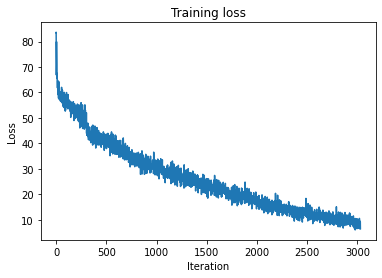

In [0]:
import matplotlib.pyplot as plt
plt.plot(tloss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss')
plt.savefig('loss_ep10_3layers-drop5.png')
plt.show()

# Validation

Here, we run the validation loop to generate abstractive summaries from the model. We also defiend the hyperparamters for decoding the decoder for the summaries generated. We also save the generated summaries in a text file so that we can access it in future.

In [0]:
import tensorflow as tf
import pickle

tf.reset_default_graph()

class args:
    pass

# Defining the hyperparameters for validation  
# Consider just one epoch as you just go once throught the entire validation set
args.num_hidden=400
args.num_layers=3
args.beam_width=10
args.glove="store_true"
args.embedding_size=300
args.learning_rate=1e-3
args.batch_size=64
args.keep_prob = 0.5
args.toy=True
args.with_model="store_true"

print("Loading dictionary...")
word_dict, reversed_dict, article_max_len, summary_max_len = build_dict("valid", args.toy)
print("Loading validation dataset...")
valid_x = build_dataset("valid", word_dict, article_max_len, summary_max_len, args.toy)
valid_x_len = [len([y for y in x if y != 0]) for x in valid_x]
print("Loading article and reference...")
article = valid_text
reference = valid_summary

with tf.Session() as sess:
    print("Loading saved model...")
    model = Model(reversed_dict, article_max_len, summary_max_len, args, forward_only=True)
    saver = tf.train.Saver(tf.global_variables())
    #saver = tf.train.import_meta_graph('/content/gdrive/My Drive/Bengali Summarization/saved_model/model.ckpt-909.meta')
    #saver.restore(sess,tf.train.latest_checkpoint(default_path))
    ckpt = tf.train.get_checkpoint_state(default_path + "saved_model/")
    #saver.restore(sess, '/content/gdrive/My Drive/Bengali Summarization/saved_model/model.ckpt-909.meta')
    saver.restore(sess, ckpt.model_checkpoint_path)

    batches = batch_iter(valid_x, [0] * len(valid_x), args.batch_size, 1)

    print("Writing summaries to 'result.txt'...")
    for batch_x, _ in batches:
        batch_x_len = [len([y for y in x if y != 0]) for x in batch_x]

        valid_feed_dict = {
            model.batch_size: len(batch_x),
            model.X: batch_x,
            model.X_len: batch_x_len,
        }

        prediction = sess.run(model.prediction, feed_dict=valid_feed_dict)
        prediction_output = [[reversed_dict[y] for y in x] for x in prediction[:, 0, :]]
        summary_array = []
        with open(default_path + "result-ep10-3layers-dp5.txt", "a") as f:
            for line in prediction_output:
                summary = list()
                for word in line:
                    if word == "<EOS>":
                        break
                    if word not in summary:
                        summary.append(word)
                summary_array.append(" ".join(summary))
                print(" ".join(summary), file=f)

    print('Summaries have been generated')

Loading dictionary...
Loading validation dataset...
Loading article and reference...
Loading saved model...
Instructions for updating:
Use `tf.cast` instead.


05/29/2020 19:41:31 - WARNING - tensorflow -   From /tensorflow-1.15.2/python3.6/tensorflow_core/contrib/seq2seq/python/ops/beam_search_decoder.py:971: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


INFO:tensorflow:Restoring parameters from /content/gdrive/My Drive/Bengali Summarization/saved_model/model.ckpt-3030


05/29/2020 19:41:31 - INFO - tensorflow -   Restoring parameters from /content/gdrive/My Drive/Bengali Summarization/saved_model/model.ckpt-3030


Writing summaries to 'result.txt'...
Summaries have been generated


In [0]:
len(prediction_output)

43

# Evaluate

Here we evaluate the ROUGE metrics (ROUGE-1, ROUGE-2, and ROUGE-L) for the summaries generated.

In [0]:
# Installling the official rouge package to calculate the ROUGE scores
!pip install rouge

In [0]:
# Saving the ground truth summary in a text file to evaluate generated summaries from the decoder
article = valid_text
reference = valid_summary
with open('/content/gdrive/My Drive/Bengali Summarization/reference.txt',mode='w') as f:
    for line in reference:
        print("".join(line), file=f)
        

In [0]:
from rouge import FilesRouge
from rouge import Rouge 
# Calculating ROUGE scores across all generated summaries from the validation set
files_rouge = FilesRouge()
scores = files_rouge.get_scores('/content/gdrive/My Drive/Bengali Summarization/result-ep20-3layers.txt', '/content/gdrive/My Drive/Bengali Summarization/reference.txt')

In [0]:
reference[73]

'আগুনে ১৫টি দোকান পুড়ে গেছে'

In [0]:
article[4]

'স্বরাষ্ট্র প্রতিমন্ত্রী শামসুল হক টুকু বলেছেন সাংবাদিক দম্পতি সাগর সরওয়ার ও মেহেরুন রুনি হত্যা মামলার আপাতত কোনো অগ্রগতি নেই  ডিএনএর পূর্ণাঙ্গ রিপোর্ট পেলেই এ মামলার অগ্রগতি হবে  এ ছাড়া তদন্ত কার্যক্রম অব্যাহত রয়েছে  সাগর রুনির হত্যা উন্মোচনে সরকার অত্যন্ত আন্তরিক বলেও জানান তিনি  গতকাল মঙ্গলবার সচিবালয়ের সম্মেলনকক্ষে এক ইফতার মাহফিলে উপস্থিত ছিলেন স্বরাষ্ট্র প্রতিমন্ত্রী  এ সময় সাগর রুনি হত্যা মামলা সম্পর্কে সাংবাদিকেরা জানতে চাইলে তিনি ওই মন্তব্য করেন  বিএনপির সিনিয়র ভাইস চেয়ারম্যান তারেক রহমান দেশে ফিরলে গ্রেপ্তার করা হবে কি না—সাংবাদিকদের এই প্রশ্নের উত্তরে স্বরাষ্ট্র প্রতিমন্ত্রী বলেন আইনি প্রক্রিয়ায় সবকিছু হবে  আদালত যদি তাঁকে জামিন দেন তাহলে জামিন পাবেন  আর জামিন না দিলে এ ক্ষেত্রে আদালত যা বলবেন তা আইনি প্রক্রিয়া মোতাবেক হবে '

In [0]:
scores

[{'rouge-1': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.1666666618055557, 'p': 0.2, 'r': 0.14285714285714285}},
 {'rouge-1': {'f': 0.36363635867768596, 'p': 0.4, 'r': 0.3333333333333333},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.36363635867768596, 'p': 0.4, 'r': 0.3333333333333333}},
 {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.0, 'p': 0.0, 'r': 0.0}},
 {'rouge-1': {'f': 0.999999995, 'p': 1.0, 'r': 1.0},
  'rouge-2': {'f': 0.999999995, 'p': 1.0, 'r': 1.0},
  'rouge-l': {'f': 0.999999995, 'p': 1.0, 'r': 1.0}},
 {'rouge-1': {'f': 0.7142857093877552, 'p': 0.8333333333333334, 'r': 0.625},
  'rouge-2': {'f': 0.499999995138889, 'p': 0.6, 'r': 0.42857142857142855},
  'rouge-l': {'f': 0.7142857093877552, 'p': 0.8333333333333334, 'r': 0.625}},
 {'rouge-1': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-2': {'f': 0.0, 'p': 0.0,

In [0]:
#  Calculating the average ROUGE scores across all the summaries generated from the validation set
scores_avg = files_rouge.get_scores('/content/gdrive/My Drive/Bengali Summarization/result-ep10-3layers-dp5.txt', '/content/gdrive/My Drive/Bengali Summarization/reference.txt', avg=True)
print(scores_avg)

{'rouge-1': {'f': 0.12380831375784508, 'p': 0.1324789980478601, 'r': 0.11856089141088107}, 'rouge-2': {'f': 0.051148270675552325, 'p': 0.05379733144548332, 'r': 0.04970018911274318}, 'rouge-l': {'f': 0.12221033233126212, 'p': 0.13059090231813722, 'r': 0.11715829052448917}}


In [0]:
# Reading the generated summaries from the file
file = open('/content/gdrive/My Drive/Bengali Summarization/result-3.txt', 'r')
# read all text
text = file.read()
summary_arr = []
for sent in text.split('\n'):
    summary_arr.append(sent)

In [0]:
len(summary_arr)

4844